<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/13_ML_NaiveBayes_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's Create Navie Bayes Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]


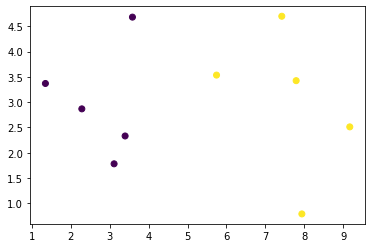

In [3]:
df = pd.DataFrame(dataset)
plt.scatter(df[0],df[1], c=df[2])

In [4]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

separated = separate_by_class(dataset)

In [5]:
separated[1]

[[7.423436942, 4.696522875, 1],
 [5.745051997, 3.533989803, 1],
 [9.172168622, 2.511101045, 1],
 [7.792783481, 3.424088941, 1],
 [7.939820817, 0.791637231, 1]]

In [6]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
from math import sqrt

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
 

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

summary = summarize_dataset(dataset)
summary

[(5.178333386499999, 2.7665845055177263, 10),
 (2.9984683241, 1.218556343617447, 10)]

In [7]:
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [8]:
summarize_by_class(dataset)

{0: [(2.7420144012, 0.9265683289298018, 5),
  (3.0054686692, 1.1073295894898725, 5)],
 1: [(7.6146523718, 1.2344321550313704, 5),
  (2.9914679790000003, 1.4541931384601618, 5)]}

In [9]:
from math import sqrt
from math import pi
from math import exp
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [10]:
calculate_probability(2.7420144012,0.92, 9.17)

0.042654808645052965

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


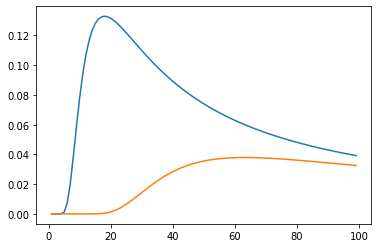

In [11]:
import numpy as np
x1 = [calculate_probability(2.74,0.92,x) for x in np.linspace(0,10,100)]
x2 = [calculate_probability(7.61,1.23,x) for x in np.linspace(0,10,100)]
plt.plot(x1)
plt.plot(x2)

In [12]:
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities


summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[7])
print(probabilities)

{0: 2.44629984336952e-12, 1: 0.018937264964228803}


# Loading Data to Test Our Functions

In [13]:
from google.colab import drive
drive.mount("/content/drive")
data_dir = "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"
!ls "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"

Mounted at /content/drive
 archive.zip
'breast cancer.csv'
 breast_cancer_data.csv
'Breast Cancer Dignostics_google.ipynb'
'Breast Cancer Dignostics.ipynb'
 diamonds.csv
 gender_submission.csv
'Group Project 1 Text for Analysis -- full version(1).txt'
 HR_comma_sep.csv
 iris.csv
 spam.csv
 spam_resaved.xlsx
 spam.xlsx
 submission_final.csv
 tatanic_submission.csv
 test.csv
 train.csv
 train-images-idx3-ubyte.gz
 train-labels-idx1-ubyte.gz


In [14]:
df = pd.read_csv(data_dir +'/iris.csv',header=None)

In [15]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
df[4]=df[4].astype('category').cat.codes
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
summaries = summarize_by_class(df.to_numpy())
summaries

{0.0: [(5.005999999999999, 0.3524896872134512, 50),
  (3.4180000000000006, 0.38102439795469095, 50),
  (1.464, 0.1735111594364455, 50),
  (0.2439999999999999, 0.10720950308167837, 50)],
 1.0: [(5.936, 0.5161711470638635, 50),
  (2.7700000000000005, 0.3137983233784114, 50),
  (4.26, 0.46991097723995806, 50),
  (1.3259999999999998, 0.197752680004544, 50)],
 2.0: [(6.587999999999998, 0.635879593274432, 50),
  (2.9739999999999998, 0.3224966381726376, 50),
  (5.552, 0.5518946956639835, 50),
  (2.026, 0.27465005563666733, 50)]}

In [19]:
calculate_class_probabilities(summaries, [5.0,3.6,1.4,0.2,0])

{0.0: 2.5890061173739514,
 1.0: 2.702798311974989e-18,
 2.0: 2.3607221382040533e-25}

## Shuffle the Data then Split

In [20]:
 from sklearn.model_selection import ShuffleSplit
 cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
 list(cv.split(df))

[(array([ 60, 116, 144, 119, 108,  69, 135,  56,  80, 123, 133, 106, 146,
          50, 147,  85,  30, 101,  94,  64,  89,  91, 125,  48,  13, 111,
          95,  20,  15,  52,   3, 149,  98,   6,  68, 109,  96,  12, 102,
         120, 104, 128,  46,  11, 110, 124,  41, 148,   1, 113, 139,  42,
           4, 129,  17,  38,   5,  53, 143, 105,   0,  34,  28,  55,  75,
          35,  23,  74,  31, 118,  57, 131,  65,  32, 138,  14, 122,  19,
          29, 130,  49, 136,  99,  82,  79, 115, 145,  72,  77,  25,  81,
         140, 142,  39,  58,  88,  70,  87,  36,  21,   9, 103,  67, 117,
          47]),
  array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
          54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
          44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
          92, 112,   2, 141,  43,  10])),
 (array([ 80, 107,  90,   0,  36, 112,   5,  57, 102,  55,  34, 128,  33,
          21,  73,   7,  45, 129, 103, 146, 120,  94, 

In [21]:
splits = 5
from random import shuffle

data = df.to_numpy()
shuffle(data)
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [5.1, 3.5, 1.4, 0.2, 0. ],
       [5.1, 3.5, 1.4, 0.2, 0. ],
       [5.1, 3.5, 1.4, 0.2, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [5.1, 3.5, 1.4, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [4.9, 3

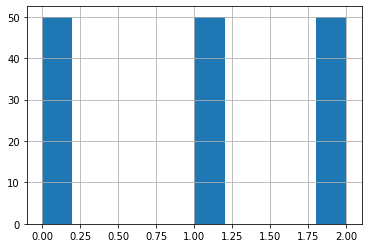

In [22]:
df[4].hist() #review the number of each class

## K-Folds Cross-Validattion

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(df)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [24]:
def get_class(class_dict):
  cl = -1
  max = -1
  for c,p in class_dict.items():
    if p>max:
      cl=c
      max=p
  return(cl)

errors =[]
for train_index, test_index in kf.split(df):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = df.iloc[train_index], df.iloc[test_index]
  summaries = summarize_by_class(X_train.to_numpy())

  for i,row in X_test.iterrows():
    classes = calculate_class_probabilities(summaries, row.to_numpy())
    cl = get_class(classes)
    errors.append(abs(row[4]-cl))

In [25]:
mean(errors)

0.05333333333333334